***Hosptial Operations Analysis***

**Amber Locasto**

**IAF 601- Python**

**Objectives: Analyze patient, staff, and service data to evaluate hospital operations, efficency, and service quality**

STRUCTURE OF PROJECT:
1. import data
2. explore data
3. clean data
4. organize data
5. validate data

**********

***IMPORTING DATA***

**********

In [2]:
#step 1: load data 

import pandas as pd

#loading our data from the data_raw folder 
patients = pd.read_csv("data_raw/patients.csv")
services_weekly = pd.read_csv("data_raw/services_weekly.csv")
staff = pd.read_csv("data_raw/staff.csv")
staff_schedule = pd.read_csv("data_raw/staff_schedule.csv")

print("✅Data Loaded Successfully✅")

✅Data Loaded Successfully✅


**********

***EXPLORE***

**********

In [3]:
# Quick look at the first few rows of each dataset
print(f"👩🏼‍⚕️---PATIENTS QUICK LOOK---👩🏼‍⚕️ \n{patients.head()}")
print(f"---🏥STAFF QUICK LOOK🏥--- \n{staff.head()}")
print(f"🩻---SERVICES WEEKLY QUICK LOOK--- 🩻 \n{services_weekly.head()}")
print(f"🗓️---STAFF SCHEDULE QUICK LOOK---🗓️\n{staff_schedule.head()}")

👩🏼‍⚕️---PATIENTS QUICK LOOK---👩🏼‍⚕️ 
     patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24    3/16/2025      3/22/2025   
1  PAT-f0644084     Shannon Walker    6   12/13/2025     12/14/2025   
2  PAT-ac6162e4       Julia Torres   24    6/29/2025       7/5/2025   
3  PAT-3dda2bb5    Crystal Johnson   32   10/12/2025     10/23/2025   
4  PAT-08591375        Garrett Lin   25    2/18/2025      2/25/2025   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  
---🏥STAFF QUICK LOOK🏥--- 
       staff_id       staff_name    role    service
0  STF-5ca26577     Allison Hill  doctor  emergency
1  STF-02ae59ca      Noah Rhodes  doctor  emergency
2  STF-d8006e7c  Angie Henderson  doctor  emergency
3  STF-212d8b31    Daniel Wagner  doctor  emergency
4  STF-107a58e4  Cristian Santos  

***Lets use matplotlib for some simple visual sanity checks***

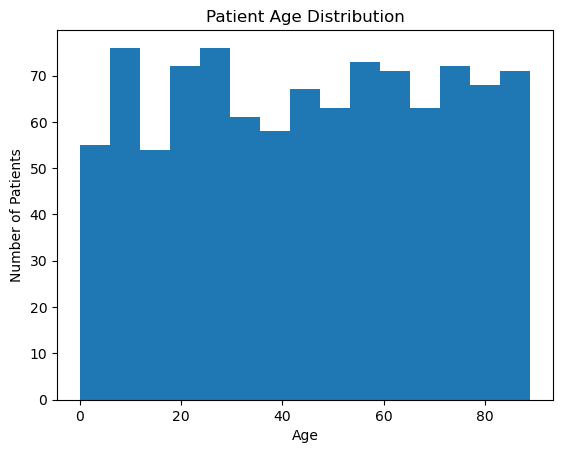

In [68]:
#patient age distribution
import matplotlib.pyplot as plt
plt.figure()
plt.hist(patients["age"].dropna(), bins=15)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

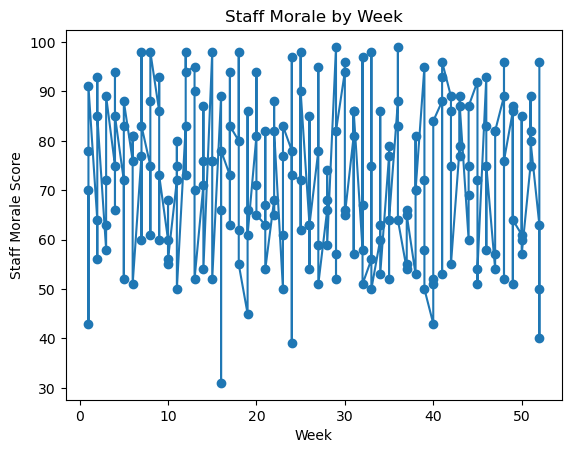

In [69]:
#Staff moral by weeks
plt.figure()
plt.plot(services_weekly["week"], services_weekly["staff_morale"], marker="o")
plt.title("Staff Morale by Week")
plt.xlabel("Week")
plt.ylabel("Staff Morale Score")
plt.show()

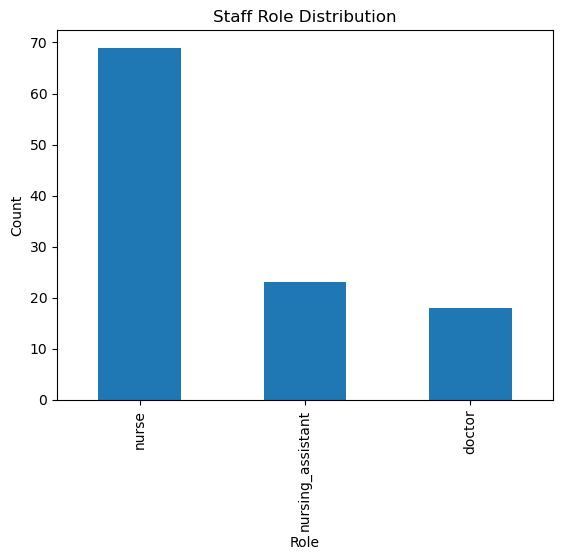

In [70]:
#staff role distribution
plt.figure()
staff["role"].value_counts().plot(kind="bar")
plt.title("Staff Role Distribution")
plt.xlabel("Role")
plt.ylabel("Count")
plt.show()

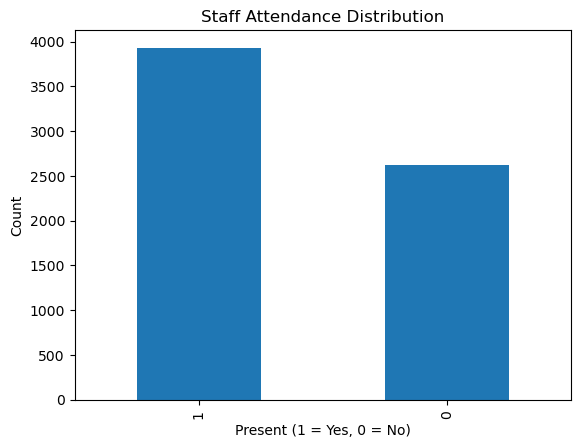

In [71]:
#attendance distribution
plt.figure()
staff_schedule["present"].value_counts().plot(kind="bar")
plt.title("Staff Attendance Distribution")
plt.xlabel("Present (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Why would we want some quick visual sanity checks?

- We use some brief charts to quickly check that our data is normal and behaving correctly as our plots will show us skew or outliers that we might need to fix or investigate before beginning any important analysis. We can also see some quick analysis information by looking at our plots like the fact that we have more nurse data than doctors and nurse assistants in our staff roles. Our staff moral seems to climb and decrease pretty often showing no real patterns but we see around week 17 we have a massive dip in moral which may be due to different environmental issues. This is important because we are analyzing this data to make sure we understand what is going on in our hospital. We want our staff and patients to be happy so we can succeed!

**********

***CLEAN THE DATA***

**********

In [16]:
#cleaning patients dataset
# Convert arrival & departure date to datetime
patients["arrival_date"] = pd.to_datetime(patients["arrival_date"], errors="coerce")
patients["departure_date"] = pd.to_datetime(patients["departure_date"], errors="coerce")

# Convert satisfaction to numeric to avoid weird values that may exist
patients["satisfaction"] = pd.to_numeric(patients["satisfaction"], errors="coerce")

# Normalize text by lowercase and remove spaces
patients["service"] = patients["service"].str.lower().str.strip()

# Drop rows where dates could not convert properly
patients = patients.dropna(subset=["arrival_date", "departure_date"])

print("✅ Patients Dataset Cleaned")

✅ Patients Dataset Cleaned


In [15]:
#cleaning services_weekly dataset
# Standardize service text
services_weekly["service"] = services_weekly["service"].str.lower().str.strip()

# Convert numeric columns safely
services_weekly["available_beds"] = pd.to_numeric(services_weekly["available_beds"], errors="coerce")
services_weekly["patients_request"] = pd.to_numeric(services_weekly["patients_request"], errors="coerce")
services_weekly["patients_admitted"] = pd.to_numeric(services_weekly["patients_admitted"], errors="coerce")

# Replace impossible negatives with NaN (not expected in hospital data)
num_cols = ["available_beds", "patients_request", "patients_admitted"]
for col in num_cols:
    services_weekly[col] = services_weekly[col].apply(lambda x: x if x >= 0 else None)

# Fill missing numeric values with 0 (hospital may report 0 sometimes)
services_weekly[num_cols] = services_weekly[num_cols].fillna(0)

print("✅ Services Weekly Dataset Cleaning Completed")

✅ Services Weekly Dataset Cleaning Completed


In [17]:
#cleaning the staff dataset
# Standardize service text
staff["service"] = staff["service"].str.lower().str.strip()

# Standardize role text
staff["role"] = staff["role"].str.lower().str.strip()

# Strip whitespace from names
staff["staff_name"] = staff["staff_name"].str.strip()
print("✅ Staff Dataset Cleaned")

✅ Staff Dataset Cleaned


In [ ]:
#cleaning the staff_schedule dataset
# Standardize text columns
staff_schedule["service"] = staff_schedule["service"].str.lower().str.strip()
staff_schedule["staff_name"] = staff_schedule["staff_name"].str.strip()
staff_schedule["role"] = staff_schedule["role"].str.lower().str.strip()

# Convert present column to boolean for consistency
staff_schedule["present"] = staff_schedule["present"].astype(int)
print("✅ Staff Schedule Dataset Cleaned")

✅ Staff Schedule Dataset Cleaned


In [14]:
#saving cleaned data to new folders 
patients.to_csv("data_clean/patients_cleaned.csv", index=False)
services_weekly.to_csv("data_clean/services_weekly_cleaned.csv", index=False)
staff.to_csv("data_clean/staff_cleaned.csv", index=False)
staff_schedule.to_csv("data_clean/staff_schedule_cleaned.csv", index=False)

print("✅ All files cleaned & saved!🗂️")

✅ All files cleaned & saved!🗂️


- We just converted dates to real dates so we can eventually calculate different metrics with out dates
-We just standardized our text to make analysis easy
- We just made numbers numeric in order to calculate metrics 
- We handled bad values incase our data sets have any errors we remoce corrupted data
-Finally we saved our clean files into a folder called clean_data in order to use it later and show professional workflow 

**********

***ORGANIZE / VALIDATE***

**********

In [50]:
#exploring data types
print(f"---📈PATIENT DATA TYPES---📉\n{patients.dtypes}")
print(f"---📈STAFF DATA TYPES---📉\n{staff.dtypes}")
print(f"---📈SERVICES WEEKLY DATA TYPES---📉\n{services_weekly.dtypes}")
print(f"---📈STAFF SCHEDULE DATA TYPES---📉\n{staff_schedule.dtypes}")

---📈PATIENT DATA TYPES---📉
patient_id                object
name                      object
age                        int64
arrival_date      datetime64[ns]
departure_date    datetime64[ns]
service                 category
satisfaction               int64
dtype: object
---📈STAFF DATA TYPES---📉
staff_id        object
staff_name      object
role          category
service       category
dtype: object
---📈SERVICES WEEKLY DATA TYPES---📉
week                       int64
month                      int64
service                 category
available_beds             int64
patients_request           int64
patients_admitted          int64
patients_refused           int64
patient_satisfaction       int64
staff_morale               int64
event                     object
dtype: object
---📈STAFF SCHEDULE DATA TYPES---📉
week             int64
staff_id        object
staff_name      object
role          category
service       category
present          int64
dtype: object


In [21]:
print(f"---🧮COLUMNS IN PATIENTS DATASET---🧮\n{patients.columns}")
print(f"---🧮COLUMNS IN STAFF DATASET---🧮\n{staff.columns}")
print(f"---🧮COLUMNS IN SERVICES WEEKLY DATASET---🧮\n{services_weekly.columns}")
print(f"---🧮COLUMNS IN STAFF SCHEDULE DATASET---🧮\n{staff_schedule.columns}")

---🧮COLUMNS IN PATIENTS DATASET---🧮
Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction'],
      dtype='object')
---🧮COLUMNS IN STAFF DATASET---🧮
Index(['staff_id', 'staff_name', 'role', 'service'], dtype='object')
---🧮COLUMNS IN SERVICES WEEKLY DATASET---🧮
Index(['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event'],
      dtype='object')
---🧮COLUMNS IN STAFF SCHEDULE DATASET---🧮
Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')


In [ ]:
#converting all columns to correct data types for later analysis
# patients dataset
patients['arrival_date'] = pd.to_datetime(patients['arrival_date'])
patients['departure_date'] = pd.to_datetime(patients['departure_date'])
patients['service'] = patients['service'].astype('category')
patients['satisfaction'] = patients['satisfaction'].astype(int)

# services_weekly dataset
services_weekly['service'] = services_weekly['service'].astype('category')
services_weekly['week'] = services_weekly['week'].astype(int)
services_weekly['month'] = services_weekly['month'].astype(int)

# staff dataset
staff['service'] = staff['service'].astype('category')
staff['role'] = staff['role'].astype('category')

# staff_schedule dataset
staff_schedule['service'] = staff_schedule['service'].astype('category')
staff_schedule['role'] = staff_schedule['role'].astype('category')
staff_schedule['week'] = staff_schedule['week'].astype(int)
staff_schedule['present'] = staff_schedule['present'].astype(int)  # 1 = present, 0 = absent


In [23]:
#checking summary stats
patients.describe(include='all')

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
count,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,1000,993,NaN,NaN,NaN,4,NaN
top,PAT-e2ef9c5f,Matthew Moore,NaN,NaN,NaN,emergency,NaN
freq,1,2,NaN,NaN,NaN,263,NaN
mean,NaN,NaN,45.337000,2025-07-03 04:29:16.800000256,2025-07-10 14:15:21.600000256,NaN,79.597000
min,NaN,NaN,0.000000,2025-01-02 00:00:00,2025-01-06 00:00:00,NaN,60.000000
25%,NaN,NaN,23.000000,2025-04-05 18:00:00,2025-04-13 00:00:00,NaN,70.000000
50%,NaN,NaN,46.000000,2025-07-07 00:00:00,2025-07-14 00:00:00,NaN,80.000000
75%,NaN,NaN,68.000000,2025-09-30 00:00:00,2025-10-09 00:00:00,NaN,89.250000
max,NaN,NaN,89.000000,2025-12-31 00:00:00,2026-01-13 00:00:00,NaN,99.000000


In [24]:
services_weekly.describe(include='all')

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
count,208.000000,208.000000,208,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,ICU,NaN,NaN,NaN,NaN,NaN,NaN,none
freq,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,164
mean,26.500000,6.923077,NaN,30.346154,64.870192,28.129808,36.740385,80.000000,72.567308,NaN
std,15.044539,3.634755,NaN,15.172929,58.738572,14.676791,55.015763,11.125546,15.457759,NaN
min,1.000000,1.000000,NaN,8.000000,5.000000,5.000000,0.000000,60.000000,31.000000,NaN
25%,13.750000,4.000000,NaN,18.000000,23.750000,16.000000,0.000000,70.000000,60.000000,NaN
50%,26.500000,7.000000,NaN,27.500000,49.000000,26.000000,13.500000,81.000000,73.000000,NaN
75%,39.250000,10.000000,NaN,40.000000,86.000000,37.000000,52.500000,89.000000,86.000000,NaN


In [31]:
staff.describe(include='all')

,staff_id,staff_name,role,service
count,110,110,110,110
unique,110,110,3,4
top,STF-5ca26577,Allison Hill,nurse,ICU
freq,1,1,69,32


There is 110 staff count plus 110 unique IDs this is important to see because that means we should not find any duplicated IDs. We have 3 roles, nurse, doctor, and nursing assistant. We have 4 services, emergency, surgery, gen med and ICU. 

In [32]:
staff_schedule.describe(include='all')

,week,staff_id,staff_name,role,service,present
count,6552.000000,6552,6552,6552,6552,6552.000000
unique,NaN,126,126,3,4,NaN
top,NaN,STF-b77cdc60,Allison Hill,nurse,emergency,NaN
freq,NaN,52,52,3796,2028,NaN
mean,26.500000,NaN,NaN,NaN,NaN,0.599817
std,15.009476,NaN,NaN,NaN,NaN,0.489973
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,13.750000,NaN,NaN,NaN,NaN,0.000000
50%,26.500000,NaN,NaN,NaN,NaN,1.000000
75%,39.250000,NaN,NaN,NaN,NaN,1.000000


Above seems a little messy so lets make a function to show our summary stats in a reusbale and simple function⬇️

In [124]:
#function for summary stats
def show_summary_stats(df, name="Dataset"):
    """
    Prints shape, and described statistics of a given dataset
    """
    print(f"\n📊 Data Summary: {name}")
    print("=" * 50)
    print(f"🧾Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
    print("=" * 50)
    print("\n📊Describe:\n", df.describe(include='all'))

show_summary_stats(patients, "Patients Dataset")
show_summary_stats(services_weekly, "Services Weekly Dataset")
show_summary_stats(staff, "Staff Dataset")
show_summary_stats(staff_schedule, "Staff Schedule Dataset")



📊 Data Summary: Patients Dataset
🧾Rows: 1,000 | Columns: 8

📊Describe:
           patient_id           name          age  \
count           1000           1000  1000.000000   
unique          1000            993          NaN   
top     PAT-e2ef9c5f  Matthew Moore          NaN   
freq               1              2          NaN   
mean             NaN            NaN    45.337000   
min              NaN            NaN     0.000000   
25%              NaN            NaN    23.000000   
50%              NaN            NaN    46.000000   
75%              NaN            NaN    68.000000   
max              NaN            NaN    89.000000   
std              NaN            NaN    25.999912   

                         arrival_date                 departure_date  \
count                            1000                           1000   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq          

Okay now we have created a function to give us our descriptive statistics in one cell block which is super nice and reusable! In the function we used some fancy emoji and spacing to organize the output as well as using some indexing to call upon rows and columns of our data set to display them neatly while using plenty of embedded f strings. 

In [51]:
#quick check for missing values
print(f"---🕵️‍♂️PATIENTS MISSING VALUES🕵️‍♂️---\n{patients.isnull().sum()}")
print(f"---🕵️‍♂️STAFF MISSING VALUES🕵️‍♂️---\n{staff.isnull().sum()}")
print(f"---🕵️‍♂️SERVICES WEEKLY MISSING VALUES🕵️‍♂️---\n{services_weekly.isnull().sum()}")
print(f"---🕵️‍♂️STAFF SCHEDULE MISSING VALUES🕵️‍♂️---\n{staff_schedule.isnull().sum()}")

---🕵️‍♂️PATIENTS MISSING VALUES🕵️‍♂️---
patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64
---🕵️‍♂️STAFF MISSING VALUES🕵️‍♂️---
staff_id      0
staff_name    0
role          0
service       0
dtype: int64
---🕵️‍♂️SERVICES WEEKLY MISSING VALUES🕵️‍♂️---
week                    0
month                   0
service                 0
available_beds          0
patients_request        0
patients_admitted       0
patients_refused        0
patient_satisfaction    0
staff_morale            0
event                   0
dtype: int64
---🕵️‍♂️STAFF SCHEDULE MISSING VALUES🕵️‍♂️---
week          0
staff_id      0
staff_name    0
role          0
service       0
present       0
dtype: int64


In [44]:
#check for duplicates 
print(f"🕵️‍♀️---PATIENTS DUPLICATE CHECK---🕵️‍♀️\n{patients.duplicated().sum()}")
print(f"🕵️‍♀️---STAFF DUPLICATE CHECK---🕵️‍♀️\n{staff.duplicated().sum()}")
print(f"🕵️‍♀️---SERVICES WEEKLY DUPLICATE CHECK---🕵️‍♀️\n{services_weekly.duplicated().sum()}")
print(f"🕵️‍♀️---STAFF SCHEDULE DUPLICATE CHECK---🕵️‍♀️\n{staff_schedule.duplicated().sum()}")

🕵️‍♀️---PATIENTS DUPLICATE CHECK---🕵️‍♀️
0
🕵️‍♀️---STAFF DUPLICATE CHECK---🕵️‍♀️
0
🕵️‍♀️---SERVICES WEEKLY DUPLICATE CHECK---🕵️‍♀️
0
🕵️‍♀️---STAFF SCHEDULE DUPLICATE CHECK---🕵️‍♀️
0


***DEFINING A FUNCTION TO CHECK FOR NEGATIVE VALUES***
-above we were going through each dataframe and writing the same code for each one so below we will create our first reusable function to check for negative values in our data. This is important especially for health care data because not many data points will be negative and we want to ensure we dont have any negative values skewing our data incorrectly due to an operator error upon entering data. 

In [52]:
def check_negative_values(df, df_name):
    """ Check for negative values in numeric columns of our dataframes and print the count per column."""
    numeric_cols = df.select_dtypes(include=['number']).columns
    negative = (df[numeric_cols] < 0).sum()
    print(f"\n🕵️Negative value check for {df_name}:🕵️")
    print(negative)

check_negative_values(patients, "patients")
check_negative_values(services_weekly, "services_weekly")
check_negative_values(staff, "staff")
check_negative_values(staff_schedule, "staff_schedule")




🕵️Negative value check for patients:🕵️
age             0
satisfaction    0
dtype: int64

🕵️Negative value check for services_weekly:🕵️
week                    0
month                   0
available_beds          0
patients_request        0
patients_admitted       0
patients_refused        0
patient_satisfaction    0
staff_morale            0
dtype: int64

🕵️Negative value check for staff:🕵️
Series([], dtype: float64)

🕵️Negative value check for staff_schedule:🕵️
week       0
present    0
dtype: int64


In [55]:
#load clean data
import pandas as pd

patients = pd.read_csv("data_clean/patients_cleaned.csv")
services_weekly = pd.read_csv("data_clean/services_weekly_cleaned.csv")
staff = pd.read_csv("data_clean/staff_cleaned.csv")
staff_schedule = pd.read_csv("data_clean/staff_schedule_cleaned.csv")
print("✅ Clean Data Loaded Successfully ✅")

✅ Clean Data Loaded Successfully ✅


In [60]:
#validations for logicals

print("\n📌 PATIENT RANGE CHECKS")

print("👶Age outside 0–120:👵")
print(patients[(patients['age'] < 0) | (patients['age'] > 120)])

print("\n😄Satisfaction outside 0–100:😄")
print(patients[(patients['satisfaction'] < 0) | (patients['satisfaction'] > 100)])
print("\n⏳Negative Length of Stay:⏳")
print(patients[patients['length_of_stay'] < 0])



📌 PATIENT RANGE CHECKS
👶Age outside 0–120:👵
Empty DataFrame
Columns: [patient_id, name, age, arrival_date, departure_date, service, satisfaction, length_of_stay]
Index: []

😄Satisfaction outside 0–100:😄
Empty DataFrame
Columns: [patient_id, name, age, arrival_date, departure_date, service, satisfaction, length_of_stay]
Index: []

⏳Negative Length of Stay:⏳
Empty DataFrame
Columns: [patient_id, name, age, arrival_date, departure_date, service, satisfaction, length_of_stay]
Index: []


In [61]:
#Hosptital operations range checks
print("\n📌 SERVICES WEEKLY RANGE CHECKS")
print("\n🏥 SERVICES LOGIC ERRORS —> admitted > requested")
print(services_weekly[services_weekly['patients_admitted'] > services_weekly['patients_request']])



📌 SERVICES WEEKLY RANGE CHECKS

🏥 SERVICES LOGIC ERRORS —> admitted > requested
Empty DataFrame
Columns: [week, month, service, available_beds, patients_request, patients_admitted, patients_refused, patient_satisfaction, staff_morale, event]
Index: []


In [63]:
#validate attendance logic
print("\n📌 STAFF SCHEDULE LOGIC CHECKS")
print("\n🕗 Invalid values in 'present' column (should be 0 or 1):")
print(staff_schedule[~staff_schedule['present'].isin([0, 1])])


📌 STAFF SCHEDULE LOGIC CHECKS

🕗 Invalid values in 'present' column (should be 0 or 1):
Empty DataFrame
Columns: [week, staff_id, staff_name, role, service, present]
Index: []


---OVER VIEW OF CHECKS---
- missing data ✅

- duplicates ✅

- negative values ✅

- age, satifcation logic ✅

- service weekly consistency ✅

- attendence check ✅



***ANALYSIS***

In [77]:
# Create Length of Stay column
patients['length_of_stay'] = (patients['departure_date'] - patients['arrival_date']).dt.days

# Show the updated data
print(f"---🗓️CHECKING PATIENTS DATA FOR NEW COLUMN---🗓️\n{patients.head()}")

# Summary statistics for length of stay
print("\n🗓️Summary Stats for Length of Stay:🗓️")
print(patients['length_of_stay'].describe())

---🗓️CHECKING PATIENTS DATA FOR NEW COLUMN---🗓️
     patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  length_of_stay  
0           surgery            61               6  
1           surgery            83               1  
2  general_medicine            83               6  
3         emergency            81              11  
4               ICU            76               7  

🗓️Summary Stats for Length of Stay:🗓️
count    1000.000000
mean        7.407000
std         3.953857
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: 

From our summary statistics we see the average stay at our hospital is 7 days

In [84]:
#merging data 
for df in [patients, services_weekly, staff, staff_schedule]:
    if "service" in df.columns:
        df["service"] = df["service"].str.lower().str.strip()
print("✅ Data Merging Preparation Completed ✅")

✅ Data Merging Preparation Completed ✅


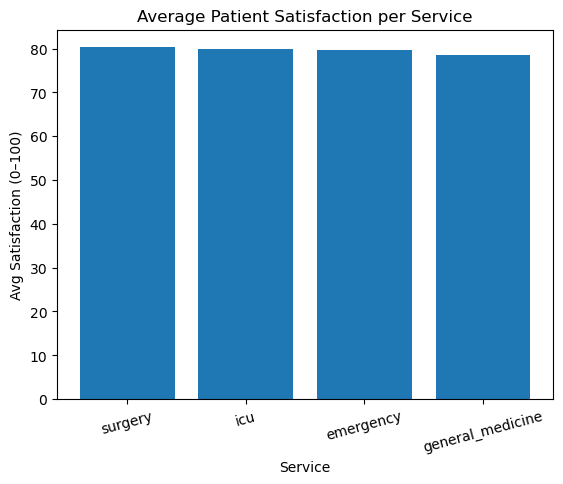

😁---AVERAGE SATISFACTION BY SERVICE---😁
            service  satisfaction
0           surgery     80.314961
1               icu     79.921162
2         emergency     79.547529
3  general_medicine     78.574380


In [88]:
#average patient satisfaction by service
satisfaction = (
    patients
    .groupby("service", dropna=False)["satisfaction"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)#variable avg_sat holds the average satisfaction by service

# PLOT: bar chart of average satisfaction by service
plt.figure()
plt.bar(satisfaction["service"], satisfaction["satisfaction"])  
plt.title("Average Patient Satisfaction per Service")
plt.xlabel("Service")
plt.ylabel("Avg Satisfaction (0–100)")
plt.xticks(rotation=15)  # tilt labels if they’re crowded
plt.show()

print(f"😁---AVERAGE SATISFACTION BY SERVICE---😁\n{satisfaction}")


From our analysis we can see our satisfaction ratings are pretty close together, surgery has the highest and general medicine has the lowest but they have about a 1.7 point difference which is not significantly large. This also suggests a consistent patient experience among the departments which is important to intepret. I would be pretty happy with these overall satisfaction ratings since we are around the 80 mark but I would always strive for higher 😁

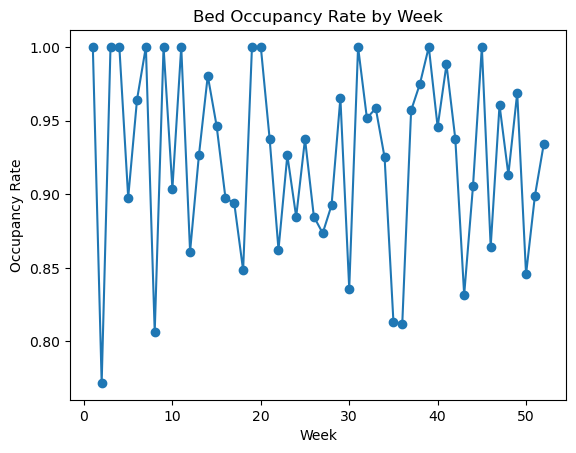

---🛏️WEEKLY BED OCCUPANCY RATES🛏️---
    week  bed_occupancy_rate
0      1            1.000000
1      2            0.771875
2      3            1.000000
3      4            1.000000
4      5            0.897727
5      6            0.964286
6      7            1.000000
7      8            0.806373
8      9            1.000000
9     10            0.903846
10    11            1.000000
11    12            0.861020
12    13            0.926471
13    14            0.980392
14    15            0.946429
15    16            0.897523
16    17            0.893750
17    18            0.848415
18    19            1.000000
19    20            1.000000
20    21            0.937500
21    22            0.862319
22    23            0.926471
23    24            0.884615
24    25            0.937500
25    26            0.884793
26    27            0.873563
27    28            0.892473
28    29            0.965278
29    30            0.835938
30    31            1.000000
31    32            0.951613
32    

In [93]:
#bed occupancy rate by week
#calculating bed occupancy rate
#1.0 = 100% full (no beds)
#.80 = 80% full (20% beds available)

#creating a new column: takes the patients admitted and divides by available beds
services_weekly["bed_occupancy_rate"] = (
    services_weekly["patients_admitted"] / services_weekly["available_beds"]
)

#calculating weekly average bed occupancy rate
weekly_occ = (
    services_weekly.groupby("week", as_index=False)["bed_occupancy_rate"]
    .mean()
    .sort_values("week")
)

#plot it
plt.figure()
plt.plot(weekly_occ["week"], weekly_occ["bed_occupancy_rate"], marker='o')
plt.title("Bed Occupancy Rate by Week")
plt.xlabel("Week")
plt.ylabel("Occupancy Rate")
plt.show()

print(f"---🛏️WEEKLY BED OCCUPANCY RATES🛏️---\n{weekly_occ}")


The fact that our beds are maxing out may be an issue as seen with this data if we are hitting 100% occupancy as many times as we see in this chart we should consider expansion because we should always have beds avaliable. We do see some of our weeks data stay in the 90s which is fine but there are many maxed out values in our chart showing we have ran out of occupancy which may explain some of our rejection numbers in our services_weekly data. Upon some quick glances at our data too I may see some correlation in satisfaction numbers decreasing near the 60s during weeks where our hospital is maxed out. This is insightful data because we do not want angry patients and we want to be able to help everyone. 🛏️

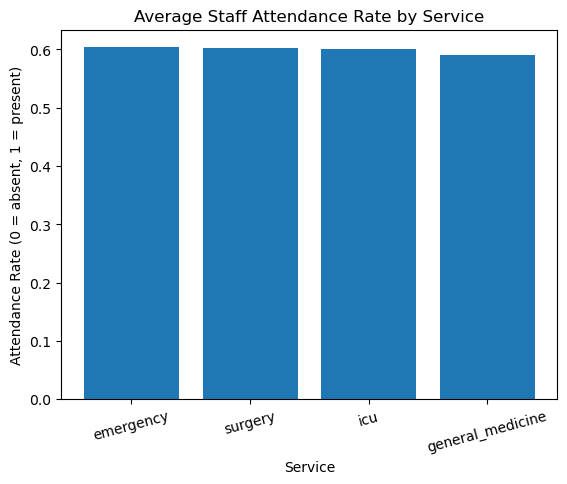

📖---STAFF ATTENDANCE RATES BY SERVICE---📖
            service   present
0         emergency  0.604043
3           surgery  0.602308
2               icu  0.601244
1  general_medicine  0.589973


In [102]:
#staff attendance rates
attendance_by_service = (
    staff_schedule.groupby("service")["present"]
    .mean()
    .reset_index()
    .sort_values("present", ascending=False)
)#variable attendance_by_service holds the attendance rates by service
#we took the mean of the present column which is 1 for present and 0 for absent so we get a percentage of attendance

#plot
plt.figure()
plt.bar(attendance_by_service["service"], attendance_by_service["present"])
plt.title("Average Staff Attendance Rate by Service")
plt.xlabel("Service")
plt.ylabel("Attendance Rate (0 = absent, 1 = present)")
plt.xticks(rotation=15)
plt.show()

print(f"📖---STAFF ATTENDANCE RATES BY SERVICE---📖\n{attendance_by_service}")

This analysis I struggled with as I was originally trying to join two csv files but then I realized that everything I need is in the staff schedule sheet using staff_id, service, and present columns. Here we are picking apart the present versus absent attendance for our staff per service. The data is close together with emergency services taking the throne for 60% presence rating and general medicine is on the bottom with 58% presence ratings but they are super close that they do not make a huge difference. 🧑‍⚕️

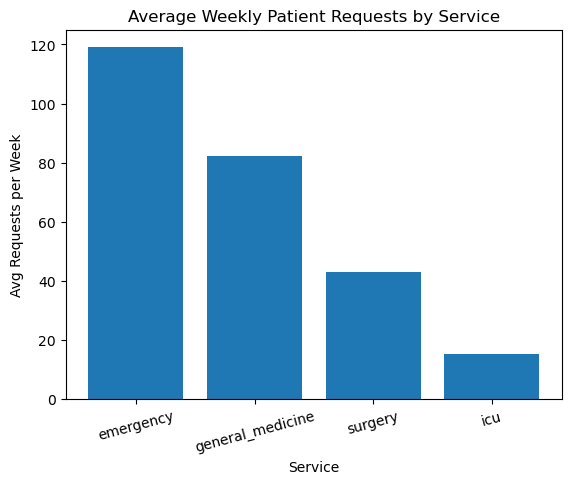

💪---WORKLOAD ANALYSIS BY SERVICE---💪
            service  avg_weekly_requests
0         emergency           119.096154
1  general_medicine            82.115385
3           surgery            43.096154
2               icu            15.173077


In [105]:
#now lets look at our workload analysis
#we can find this by muliplying the requests per week by service and compute a mean request per week for each service
workload = (
    services_weekly
    .groupby("service", as_index=False)["patients_request"]
    .mean()
    .rename(columns={"patients_request": "avg_weekly_requests"})
    .sort_values("avg_weekly_requests", ascending=False)
)

# plot workload (average weekly requests) by service
plt.figure()
plt.bar(workload["service"], workload["avg_weekly_requests"])
plt.title("Average Weekly Patient Requests by Service")
plt.xlabel("Service")
plt.ylabel("Avg Requests per Week")
plt.xticks(rotation=15)
plt.show()

#our values should be interpreted as 119.1 patients per week
#15.2 patients per week etc...
print(f"💪---WORKLOAD ANALYSIS BY SERVICE---💪\n{workload}")


This is an interesting analysis and I enjoyed this one because we really got to break into some interesting analytics. We see emergency has the highest work load with about 119 patients per week where as ICU sees about 15 patients per week. These numbers would make sense to me as someone who currently works in health care as the emergency room is always seeing new things everyday, it is a very important and fast paced environment where as ICU can see less patients as it is a far advanced stage of the hospital meaning these are more life-threatening conditions and it requires a very significant health issue to be in ICU. Emergency rooms are notorious for seeing patients that can range from falls, mental health crisis, flu, car accidents, you name it! 🤕

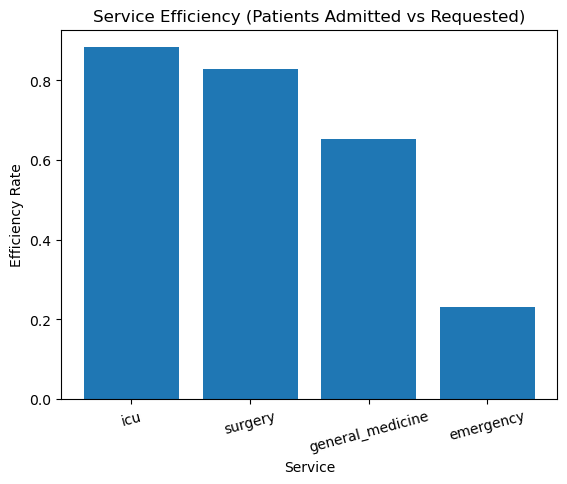

⚙️---SERVICE EFFICIENCY ANALYSIS---⚙️
            service  efficiency_rate
2               icu         0.883385
3           surgery         0.827422
1  general_medicine         0.653789
0         emergency         0.232311


In [108]:
#service level efficient for admitted versus requested
# Calculate efficiency = admitted / requested
services_weekly["efficiency_rate"] = (
    services_weekly["patients_admitted"] / services_weekly["patients_request"]
) #column for efficiency rate

#average efficiency by service
eff_service = (
    services_weekly.groupby("service", as_index=False)["efficiency_rate"]
    .mean()
    .sort_values("efficiency_rate", ascending=False)
)

#plot it
plt.figure()
plt.bar(eff_service["service"], eff_service["efficiency_rate"])
plt.title("Service Efficiency (Patients Admitted vs Requested)")
plt.xlabel("Service")
plt.ylabel("Efficiency Rate")
plt.xticks(rotation=15)
plt.show()

print(f"⚙️---SERVICE EFFICIENCY ANALYSIS---⚙️\n{eff_service}")


Okay what is going on with emergency here!! First thing I spotted was the super low effifency rating of 23% for emergency department. Lets investigate this... If our efficiency means patients admitted divided by patients requesting care, that for example, if we have 300 patients that came in and only 50 of those patients were admitted then our efficiency rate is about 16% This actually mimics real world emergency departments as many ER visits don't require hospital admission as some patients will be discharged home or transferred to another hospital. ICU makes sense being the highest as if you have a serious life threatening issue you are more likely to be admitted. 😷

👶---AGE GROUP BREAKDOWN---👵
children_0_17: 185
adults_18_64: 528
seniors_65_plus: 287


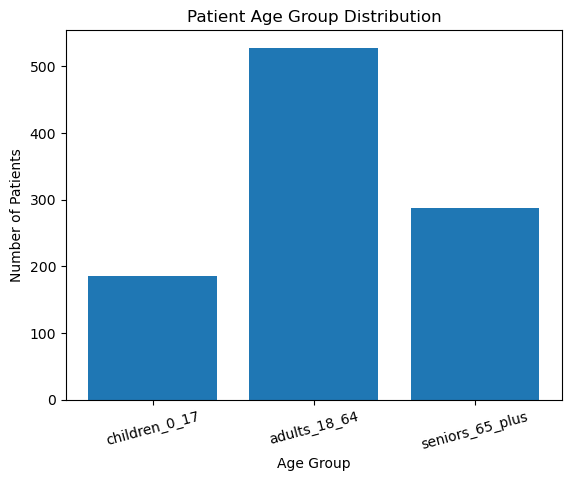

In [140]:
#creating a function to count paitents in age groups
def age_group_counts(df):
    """Return counts as child, adult, senior"""
    return {
        "children_0_17": (df["age"] <= 17).sum(),
        "adults_18_64": ((df["age"] >= 18) & (df["age"] <= 64)).sum(),
        "seniors_65_plus": (df["age"] >= 65).sum()
    }

age_groups = age_group_counts(patients)

print("👶---AGE GROUP BREAKDOWN---👵")
for group, count in age_groups.items():
    print(f"{group}: {count}")


#plot
plt.figure()
plt.bar(age_groups.keys(), age_groups.values())
plt.title("Patient Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=15)
plt.show()

I created a function to sort through the age groups of our data in patients file and using some indexing and logicals I was able to create groups called children, adults, and seniors. This is important because we want to know where the bulk ages of our patients are at so we can tailer needs to those age groups better. For instance, if we were seeing more childeren patients come through our doors we may want to consider bumping up our pedicatrics department to withstand the influx of young patients. 

🛌---LONG STAY PATIENTS (more than 7 days)---🛌
       patient_id               name  age arrival_date departure_date  \
3    PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
7    PAT-5b61868c      Ashley Waller    0   2025-05-21     2025-06-04   
8    PAT-f9c8afa6       Victor Baker   50   2025-07-30     2025-08-13   
9    PAT-5290be70   Jeffrey Chandler   29   2025-11-01     2025-11-14   
14   PAT-cc50ad71        Helen Jones   31   2025-06-11     2025-06-23   
..            ...                ...  ...          ...            ...   
992  PAT-8700b93a  Nicholas Lawrence    9   2025-10-25     2025-11-02   
994  PAT-2fa08c0d        Shawn Scott   79   2025-01-22     2025-01-31   
996  PAT-87fa07bd       Martha Smith   89   2025-11-18     2025-11-30   
997  PAT-8f07e894     Jennifer James   72   2025-12-12     2025-12-21   
998  PAT-4ae301e1     Kara Hernandez   47   2025-02-08     2025-02-20   

              service  satisfaction  length_of_stay  
3           emergency  

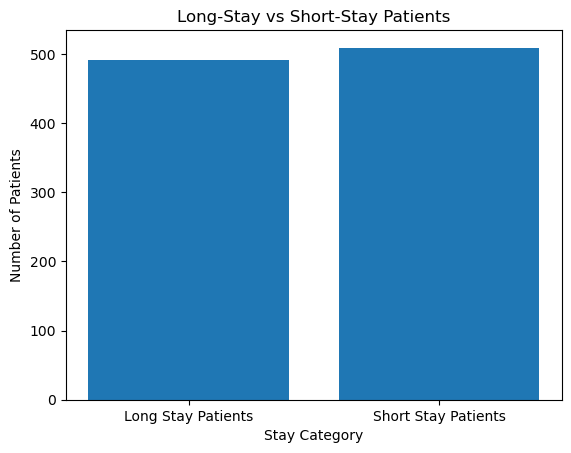

In [143]:
#creating a function to flag long stay patients 
def long_stay_patients(df, days=7):
    """Return patients staying more than 'days'"""
    long_stay = df[df["length_of_stay"] > days]
    return long_stay

long_stay_patients = long_stay_patients(patients, days=7)
print(f"🛌---LONG STAY PATIENTS (more than 7 days)---🛌\n{long_stay_patients}")
print(f"🛌Total Long Stay Patients:🛌 \n{long_stay_patients.shape[0]}")

#plot
# Count long-stay vs short-stay
long_stay_count = len(long_stay_patients)
short_stay_count = len(patients) - long_stay_count

plt.figure()
plt.bar(["Long Stay Patients", "Short Stay Patients"], [long_stay_count, short_stay_count])
plt.title("Long-Stay vs Short-Stay Patients")
plt.xlabel("Stay Category")
plt.ylabel("Number of Patients")
plt.show()


I created a function to calculate and identify the names of patients who have stayed more than 7 days in our hospital which would qualify them as a long stay patient. Long stay patients are important to keep track of since their cases are usually complex and life threatening. We can look at resource strains and discharging plans to make sure our hospital is reaching the correct needs of our patients enduring these complex medical cases. 

***A quick correlation test for satisfaction and age***

In [8]:
patients[['age', 'satisfaction']].corr()
#checking correlation between age and satisfaction

,age,satisfaction
age,1.000000,-0.056229
satisfaction,-0.056229,1.000000


r = -0.056 suggests that age does not meaningfully influence satisfaction level in our data. Both younger and older patietns reported similar satisfactoin levels implying that other factors may play a role in satisfaction. This is important because we want to know if there is any relationship between age and satisfaction as a first step in analyzing our satifaction levels. If we saw a huge correlation we may want to consider what age groups are showing the most correlations and why. For instance, if our geriatric and pedicatric departments are not putting out the best services possible we may see some correlation in our ages and satisfcation levels on those ends. 

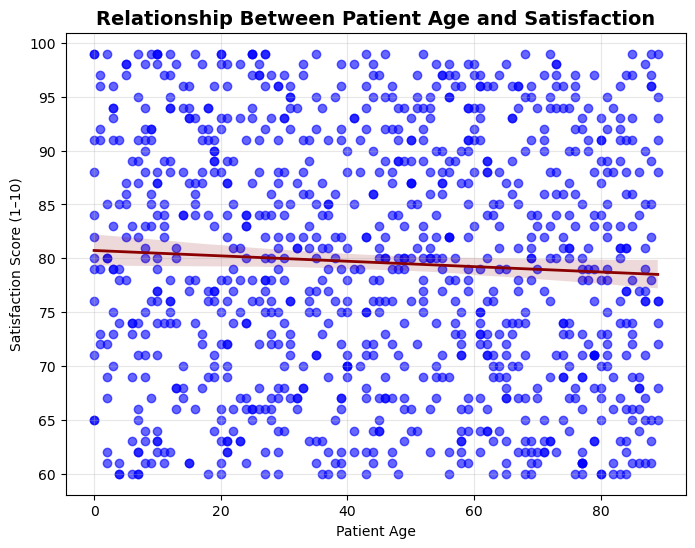

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6)) #new figure blank 8 inches wide 6 tall
sns.regplot(
    data=patients, #dataframe
    x="age",
    y="satisfaction", 
    scatter_kws={'alpha':0.6, 'color':'blue'}, #point size 0.6 and point colo
    line_kws={'color':'darkred', 'lw':2} #line color and line width
)

plt.title("Relationship Between Patient Age and Satisfaction", fontsize=14, fontweight='bold') #custom title
plt.xlabel("Patient Age")
plt.ylabel("Satisfaction Score (1–10)")
plt.grid(True, alpha=0.3)
plt.show()


What a beautiful plot, this was one of my first takes at a seaborn plot and we use it to reference our correlation test above. In order to interpret this plot we need to understand that is our poitns are randomly scattered showing no slope or linearity then we can conlcude that age does not impact satisfaction. 

***READMISSION ANALYSIS***

-lets take our analysis one step further and look into what real healthcare professionals find important when it comes to analyzing patient data

-readmission is the term used when a patient is discharged from the hospital but they are readmitted within a specific time frame usually (30, 60, 90 days).

-why is this important? --> readmission statistics can indicate potential issues with patient care, quality of care recieved and the safety of our patients and staff within our hospital. High rates of readmission can suggest issues with discharge plans, post-hospital care or patient education. 

-in our data set we were not given any specific data on readmission rates but we can create a function to do this for us. 

In [151]:
#creating a function to identify 30 day readmissions
def readmission_rate(df, days=30):
    """
    Calculate 30-day hospital readmission rate.
    """
    # Sort records by patient and admission date
    df_sorted = df.sort_values(by=["patient_id", "arrival_date"])
    #we can compare visit 1 discharge to visit 2 arrival date for each patient

    readmissions = 0
    total_patients = df["patient_id"].nunique()

    # Loop through records for each patient
    for pid in df_sorted["patient_id"].unique(): #one patient at a time
        patient_visits = df_sorted[df_sorted["patient_id"] == pid] #if patient visited hospital multiple times, collects their visits

        # Compare each discharge to next arrival
        for i in range(len(patient_visits) - 1):
            discharge = patient_visits.iloc[i]["departure_date"] #use iloc to get specific date they left hospital
            next_arrival = patient_visits.iloc[i+1]["arrival_date"] #date they came back

            # If patient came back within X days → readmission
            if (next_arrival - discharge).days <= days:
                readmissions += 1
                break  # only count the patient once

    return readmissions / total_patients


rate_30 = readmission_rate(patients, days=30)
rate_60 = readmission_rate(patients, days=60)
rate_90 = readmission_rate(patients, days=90)

print("30-Day Readmission Rate:", round(rate_30, 3))
print("60-Day Readmission Rate:", round(rate_60, 3))
print("90-Day Readmission Rate:", round(rate_90, 3))




30-Day Readmission Rate: 0.0
60-Day Readmission Rate: 0.0
90-Day Readmission Rate: 0.0


In [7]:
patients["patient_id"].value_counts().head()
#sanity check to see if any patients have multiple records

patient_id
PAT-e2ef9c5f    1
PAT-09484753    1
PAT-f0644084    1
PAT-ac6162e4    1
PAT-3dda2bb5    1
Name: count, dtype: int64

Upon running the analysis it shows there are no readmission ratings for our time frames, this is synthetic health care data so this may be why but I wanted to run this showing that I understand how important readmission is as someone who works in healthcare already, this is a huge rate to identify issues with out services. I ran a sanity check as well to take a peak at value counts to see if any patients had shown twice in our data set and everything came back clean